In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D # for creating neural network
from keras.layers import Flatten #To convert 2d matrix to single D array
from keras.layers import Dense #for Processing
from keras.layers import MaxPooling2D
from keras.layers import Dropout #to droout unwanted process
from sklearn.metrics import accuracy_score

Creating labels

In [4]:
import ipywidgets as widgets
import os
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

Train Test Split

In [5]:
X_train = []
Y_train = []
labels = ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]
for i in labels:
    fold_path = os.path.join('/kaggle/input/brain-tumor-dataset/Training',i)
    for j in os.listdir(fold_path):
        img = cv2.imread(os.path.join(fold_path,j))
        img = cv2.resize(img,(150,150))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    fold_path = os.path.join('/kaggle/input/brain-tumor-dataset/Testing',i)
    for j in os.listdir(fold_path):
        img = cv2.imread(os.path.join(fold_path,j))
        img = cv2.resize(img,(150,150))
        X_train.append(img)
        Y_train.append(i)
X_train = np.array(X_train)
Y_train = np.array(Y_train)
        

Shuffeling the Data

In [6]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
print(Y_train)

['no_tumor' 'pituitary_tumor' 'no_tumor' ... 'meningioma_tumor'
 'meningioma_tumor' 'meningioma_tumor']


Spliting the data

In [7]:


# Step 1: Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=101)

# Step 2: Split the training data further into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=101)


Changing the Y list value sing we can't pass string in Neural Network

In [8]:
Y_trainnew = []
for i in Y_train:
    Y_trainnew.append(labels.index(i))
Y_train = Y_trainnew
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_trainnew = []
for i in Y_test:
    Y_trainnew.append(labels.index(i))
Y_test = Y_trainnew
Y_test = tf.keras.utils.to_categorical(Y_test)
Y_trainnew = []
for i in Y_val:
    Y_trainnew.append(labels.index(i))
Y_val = Y_trainnew
Y_val = tf.keras.utils.to_categorical(Y_val)


Creating the Neural Network

Initialise the model

Add Layer to the model

In [9]:

model  = Sequential()

model.add(Conv2D(32,(3, 3),activation="relu",input_shape=(150,150,3))) 
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))  
model.add(Dropout(0.3))

# Second Convolutional Block
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(Dropout(0.3))
model.add(MaxPooling2D((2, 2)))  


# Third Convolutional Block
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2))) 
model.add(Dropout(0.4))

# Fourth Convolutional Block
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(Conv2D(256, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2))) 
model.add(Dropout(0.4))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(4, activation="softmax"))  # Output layer for 4 classes

# Print the model summary
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 69, 69, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

Compiling the Model

In [10]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics = ['accuracy'])

Training the model

In [11]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train,Y_train,epochs=100,validation_split=0.1, validation_data=(X_val,Y_val),callbacks=[early_stopping])

Epoch 1/100


I0000 00:00:1732550734.861168     104 service.cc:145] XLA service 0x7ecb880026b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732550734.861228     104 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 5/74 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.2639 - loss: 9.1495 

I0000 00:00:1732550748.335539     104 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


74/74 ━━━━━━━━━━━━━━━━━━━━ 31s 200ms/step - accuracy: 0.2843 - loss: 2.7243 - val_accuracy: 0.3244 - val_loss: 1.3420
Epoch 2/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.4248 - loss: 1.2634 - val_accuracy: 0.4122 - val_loss: 1.3116
Epoch 3/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.4956 - loss: 1.1523 - val_accuracy: 0.4008 - val_loss: 1.4119
Epoch 4/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.5548 - loss: 1.0427 - val_accuracy: 0.4924 - val_loss: 1.0435
Epoch 5/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.5758 - loss: 0.9857 - val_accuracy: 0.5038 - val_loss: 0.9449
Epoch 6/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.6586 - loss: 0.8129 - val_accuracy: 0.6679 - val_loss: 0.8625
Epoch 7/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6878 - loss: 0.7809 - val_accuracy: 0.6527 - val_loss: 0.8001
Epoch 8/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7091 - loss: 0.7355 - val_accuracy: 0.6679 - val

In [16]:
model.save("brain.h5")

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


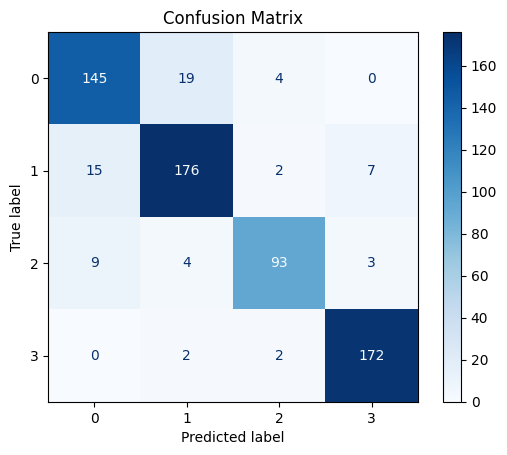

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Make predictions on the test data
# Assuming `model` is your trained model
y_pred = np.argmax(model.predict(X_test), axis=1)  # Predicted classes
y_true = np.argmax(Y_test, axis=1)  # True classes (assuming one-hot encoding for Y_test)

# Step 2: Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Step 3: Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [17]:
#for plotting
import matplotlib.pyplot as plt
import seaborn as sn

For Accuracy

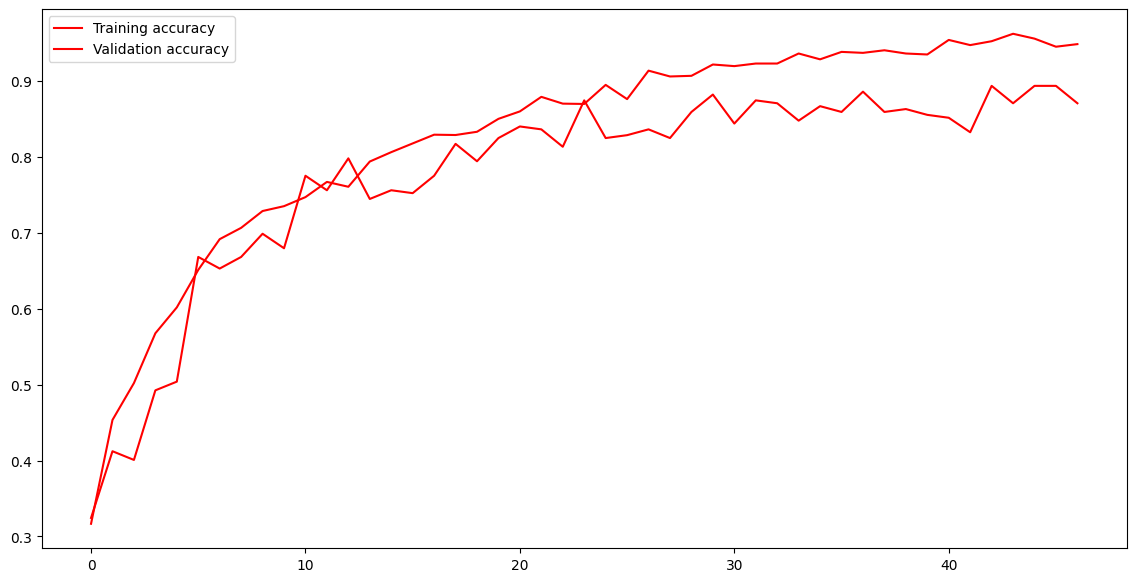

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoches = range(len(acc))
fig = plt.figure(figsize = (14,7))
plt.plot(epoches,acc,'r',label = 'Training accuracy')
plt.plot(epoches,val_acc,'r',label = 'Validation accuracy')
plt.legend(loc='upper left')
plt.show()

For Losss

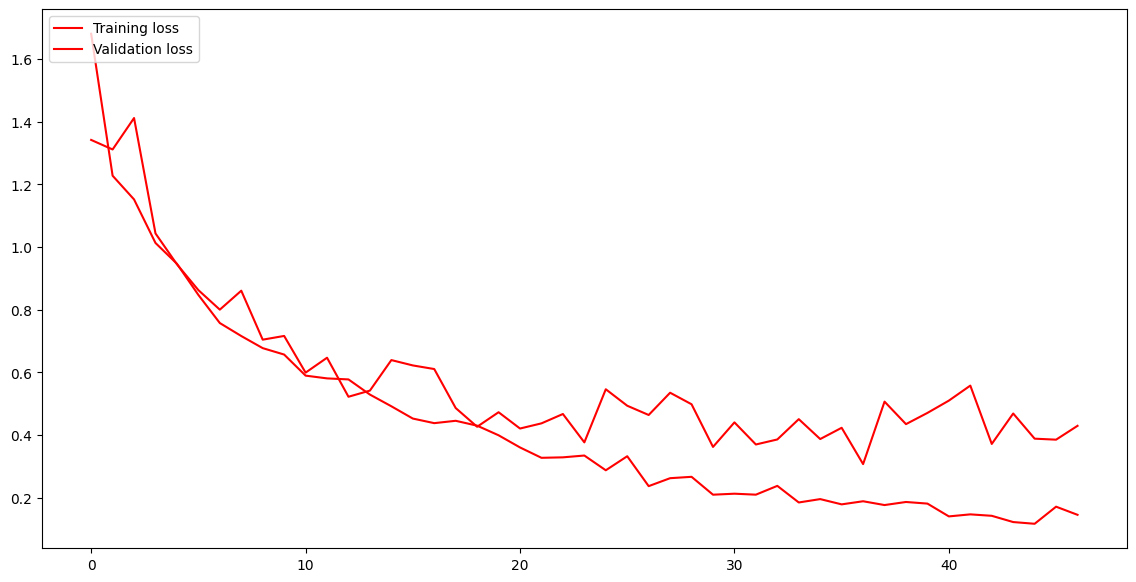

In [19]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epoches = range(len(acc))
fig = plt.figure(figsize = (14,7))
plt.plot(epoches,loss,'r',label = 'Training loss')
plt.plot(epoches,val_loss,'r',label = 'Validation loss')
plt.legend(loc='upper left')
plt.show()

Prediction

In [20]:
img = cv2.imread('/kaggle/input/brain-tumor-dataset/Testing/pituitary_tumor/image(19).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

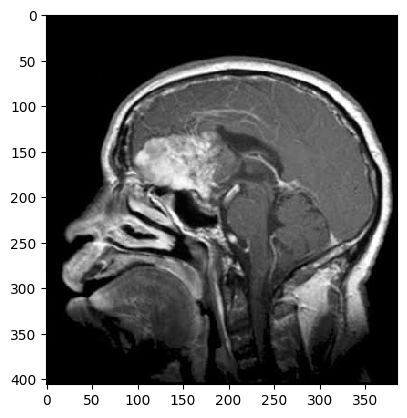

In [21]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/kaggle/input/brain-tumor-dataset/Testing/glioma_tumor/image(10).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [22]:
a = model.predict(img_array)
index = np.argmax(a,axis=1)
if index==0:
    print("Giloma Tumor")
elif index==1:
    print("Meningioma Tumor")
elif index == 2:
    print("No Tumor")
elif index == 3:
    print("Pitutiary Tumor")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step
Pitutiary Tumor
